<a href="https://colab.research.google.com/github/BilgehanUnal/BilgehanUnal/blob/main/Bilgehan_task_10_Fin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 10: Please forecast national electricity load (nat_demand) using Electricity Load Forecasting data set. You can leverage Time Series Forecasting notebook we have gone over in the class.


In [66]:
import pandas as pd


from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
df = pd.read_csv('/content/drive/MyDrive/Data/continuous dataset.csv')
train = pd.read_excel('/content/drive/MyDrive/Data/train_dataframes.xlsx')
test = pd.read_excel('/content/drive/MyDrive/Data/test_dataframes.xlsx')

In [68]:
df.head(2)

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
0,2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
1,2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0


In [69]:
df.tail(2)

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
48046,2020-06-26 23:00:00,1041.6240,26.867487,0.020464,0.064178,10.326567,25.258112,0.019403,0.108063,2.720871,23.601862,0.018358,0.152771,3.138132,0,0,1
48047,2020-06-27 00:00:00,1013.5683,26.750330,0.020441,0.063965,10.198346,25.125330,0.019281,0.100189,2.785751,23.562830,0.018404,0.162598,3.286878,0,0,1


In [70]:
train.head(2)

,datetime,week_X-2,week_X-3,week_X-4,MA_X-4,dayOfWeek,weekend,holiday,Holiday_ID,hourOfDay,T2M_toc,DEMAND
0,2015-01-31 01:00:00,962.2865,906.9580,970.3450,938.004850,1,1,0,0,1,25.308496,954.2018
1,2015-01-31 02:00:00,933.3221,863.5135,912.1755,900.284075,1,1,0,0,2,25.141443,913.8660


In [71]:
test.head(2)

,datetime,week_X-2,week_X-3,week_X-4,MA_X-4,dayOfWeek,weekend,holiday,Holiday_ID,hourOfDay,T2M_toc,DEMAND
0,2019-04-13 01:00:00,1064.7486,1204.5668,1117.8152,1118.15425,1,1,0,0,1,26.791528,1161.6177
1,2019-04-13 02:00:00,1041.7521,1145.5341,1082.5688,1078.06195,1,1,0,0,2,26.707971,1130.4635


In [72]:
df.isnull().sum()


datetime      0
nat_demand    0
T2M_toc       0
QV2M_toc      0
TQL_toc       0
W2M_toc       0
T2M_san       0
QV2M_san      0
TQL_san       0
W2M_san       0
T2M_dav       0
QV2M_dav      0
TQL_dav       0
W2M_dav       0
Holiday_ID    0
holiday       0
school        0
dtype: int64

In [73]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [74]:
df.set_index(['datetime'], inplace=True)


In [75]:
# Resample the data to ensure an hourly frequency
df = df.resample('H').sum()  #

# set the freq of index column
df.index.freq = 'H'

nice data

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import numpy as np
from datetime import datetime, timedelta
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols



In [77]:
df.select_dtypes(include='number').columns

Index(['nat_demand', 'T2M_toc', 'QV2M_toc', 'TQL_toc', 'W2M_toc', 'T2M_san',
       'QV2M_san', 'TQL_san', 'W2M_san', 'T2M_dav', 'QV2M_dav', 'TQL_dav',
       'W2M_dav', 'Holiday_ID', 'holiday', 'school'],
      dtype='object')

In [78]:
num_columns = ['nat_demand', 'T2M_toc', 'TQL_toc', 'W2M_toc', 'T2M_san',
       'QV2M_san', 'TQL_san', 'W2M_san', 'T2M_dav', 'QV2M_dav', 'TQL_dav',
       'W2M_dav', 'Holiday_ID', 'holiday', 'school']

# Convert each column to numeric
for columns in num_columns:
    df[columns] = pd.to_numeric(df[columns])

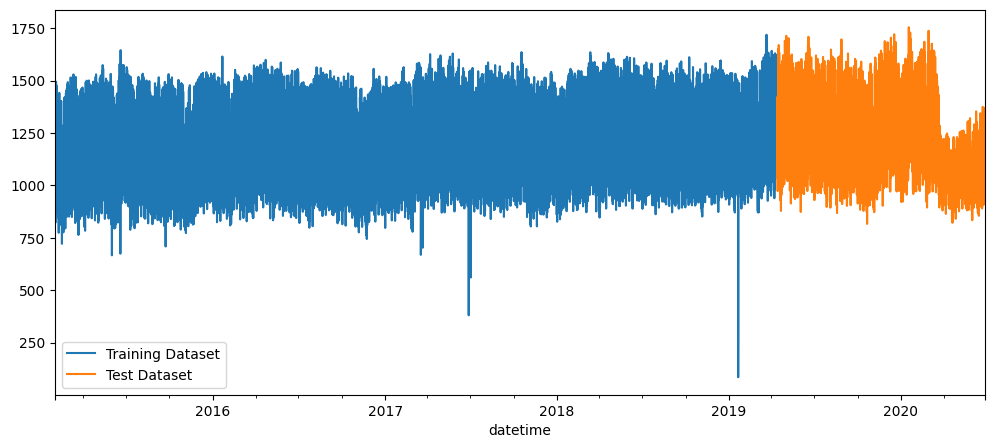

In [79]:
df.index = pd.to_datetime(df.index)

train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

train_mask = (df.index >= train['datetime'].min()) & (df.index <= train['datetime'].max())
test_mask = (df.index >= test['datetime'].min()) & (df.index <= df.index.max())

df.loc[train_mask, 'nat_demand'].plot(figsize=(12,5), legend=True)
df.loc[test_mask, 'nat_demand'].plot(figsize=(12,5), legend=True)
plt.legend(['Training Dataset', 'Test Dataset'])
plt.show()

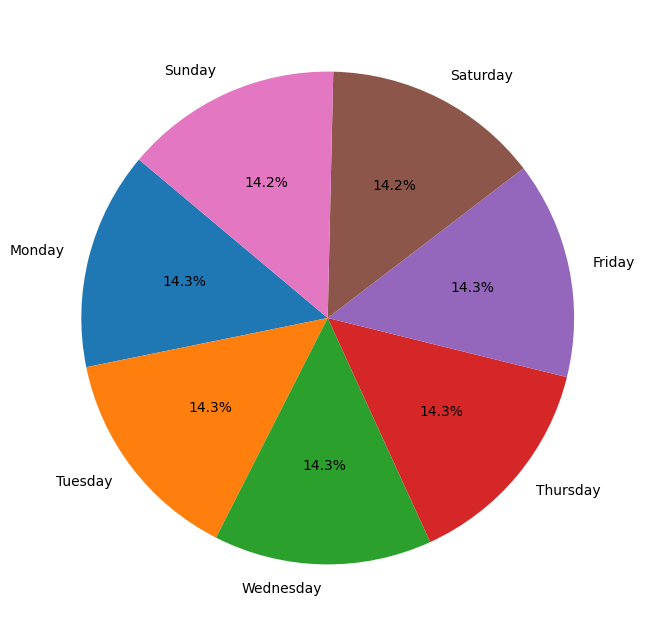

In [80]:
day_counts = train['dayOfWeek'].value_counts().sort_index()
labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create the pie chart
plt.figure(figsize=(15, 8))
plt.pie(day_counts, labels=[labels[i] for i in day_counts.index], autopct='%1.1f%%', startangle=140)
plt.show()

Text(0, 0.5, 'Temperature by city')

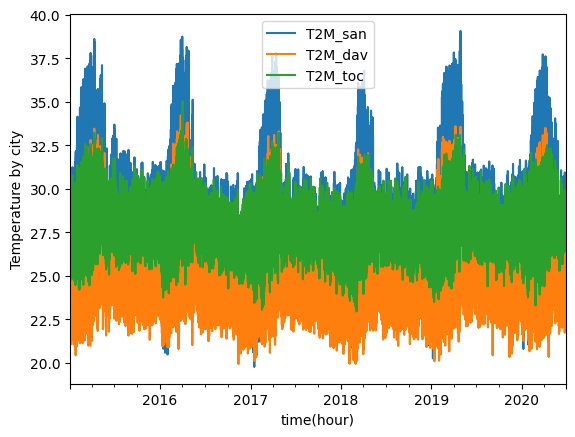

In [81]:
df[['T2M_san', 'T2M_dav', 'T2M_toc']]['2015-01-03': '2020-06-27'].plot()
plt.xlabel('time(hour)')
plt.ylabel('Temperature by city')

Text(0, 0.5, 'Wind Speed by city')

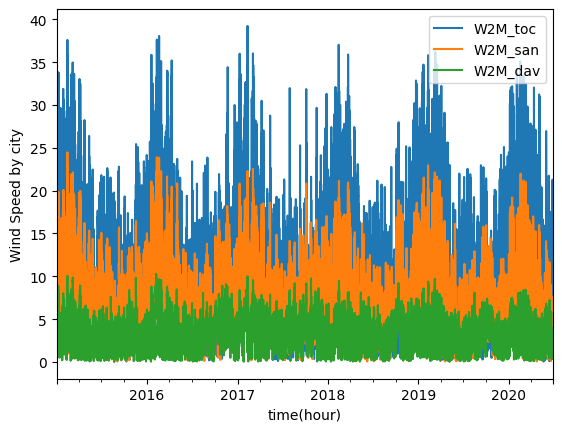

In [82]:
df[[ 'W2M_toc', 'W2M_san', 'W2M_dav']]['2015-01-03': '2020-06-27'].plot()
plt.xlabel('time(hour)')
plt.ylabel('Wind Speed by city')

Text(0, 0.5, 'Wind Speed by city')

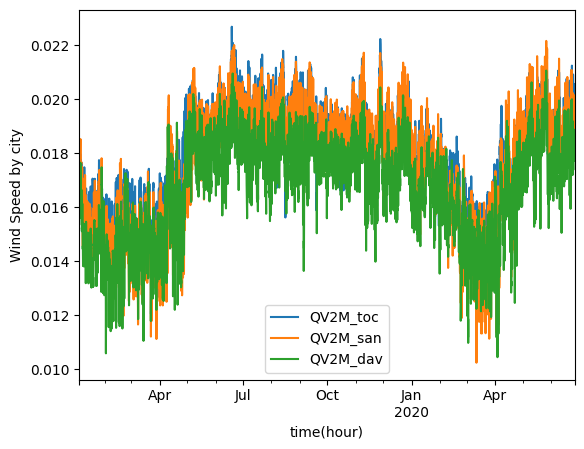

In [83]:
df[[ 'QV2M_toc', 'QV2M_san', 'QV2M_dav']]['2019-01-03': '2020-06-27'].plot()
plt.xlabel('time(hour)')
plt.ylabel('Wind Speed by city')

# **Model Part**

In [84]:
train.head(2)

,datetime,week_X-2,week_X-3,week_X-4,MA_X-4,dayOfWeek,weekend,holiday,Holiday_ID,hourOfDay,T2M_toc,DEMAND
0,2015-01-31 01:00:00,962.2865,906.9580,970.3450,938.004850,1,1,0,0,1,25.308496,954.2018
1,2015-01-31 02:00:00,933.3221,863.5135,912.1755,900.284075,1,1,0,0,2,25.141443,913.8660


In [85]:
test.head(2)

,datetime,week_X-2,week_X-3,week_X-4,MA_X-4,dayOfWeek,weekend,holiday,Holiday_ID,hourOfDay,T2M_toc,DEMAND
0,2019-04-13 01:00:00,1064.7486,1204.5668,1117.8152,1118.15425,1,1,0,0,1,26.791528,1161.6177
1,2019-04-13 02:00:00,1041.7521,1145.5341,1082.5688,1078.06195,1,1,0,0,2,26.707971,1130.4635


In [86]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data

    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val

    print(out.to_string())          # .to_string() removes the line "dtype: float64"

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [87]:
adf_test(df['nat_demand'])


Augmented Dickey-Fuller Test: 
ADF test statistic        -20.961750
p-value                     0.000000
# lags used                57.000000
# observations          47990.000000
critical value (1%)        -3.430486
critical value (5%)        -2.861600
critical value (10%)       -2.566802
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [88]:
# Printing the maximum timestamp in the dataset
print(df.index.max())

# Printing the minimum timestamp in the dataset
print(df.index.min())

2020-06-27 00:00:00
2015-01-03 01:00:00


In [89]:
dev_date_str = '2019-05-31'
# Convert dev_date_str to a datetime object
dev_date = datetime.strptime(dev_date_str, '%Y-%m-%d')
dev_date = pd.Timestamp(dev_date, tz='UTC')


df.index = df.index.tz_localize('UTC')

# Splitting the data into training and testing sets
train_data = df[:dev_date]
test_data = df[dev_date:]

# **Exponential Smoothing**

In [90]:
fitted_model = ExponentialSmoothing(train_data['nat_demand'],
                                    trend='add',
                                    seasonal='add',
                                    seasonal_periods=24).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [91]:
number_of_days = 393
number_of_hours_to_predict = number_of_days * 24
end_date = dev_date + timedelta(hours=number_of_hours_to_predict - 1)
y = test_data['nat_demand'][dev_date:end_date]
test_predictions = fitted_model.forecast(number_of_hours_to_predict).rename('HW_Forecast')

In [92]:
# Check if dev_date is in the index
if dev_date not in df.index:
    print("Warning: dev_date not found in DataFrame index. Adjust dev_date or check your DataFrame.")

# Splitting the data into training and testing sets
train_data = df.loc[:dev_date]  # Use .loc for more precise slicing
test_data = df.loc[dev_date:]

# Print the shapes of the resulting DataFrames to check if they are empty
print("Shape of train_data:", train_data.shape)
print("Shape of test_data:", test_data.shape)

Shape of train_data: (38616, 16)
Shape of test_data: (9433, 16)


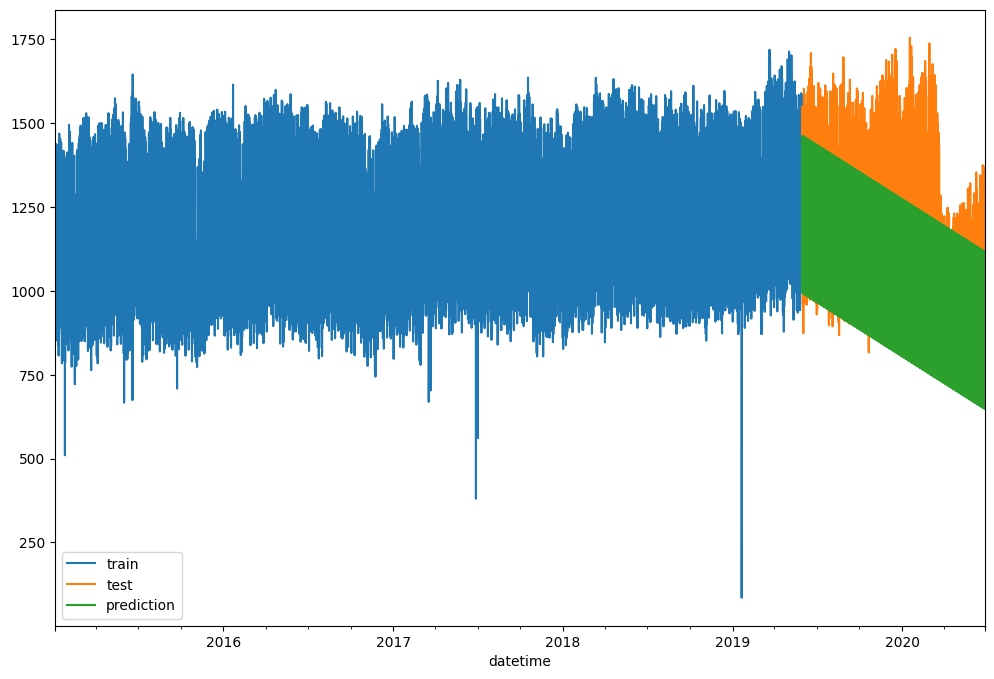

In [93]:
train_data['nat_demand'].plot(legend=True, label='train')

test_data['nat_demand'].plot(legend=True, label='test', figsize=(12,8))

test_predictions.plot(legend=True, label='prediction');

In [94]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y, test_predictions)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, test_predictions)
import numpy as np
rmse = np.sqrt(mse)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 164.17443148709918
Mean Squared Error: 39245.745519816235
Root Mean Squared Error: 198.10538993125914


# **Autoregression **

In [95]:
from statsmodels.tsa.ar_model import AutoReg,ARResults
model = AutoReg(train_data['nat_demand'], lags=1)
ARfit = model.fit()
ARfit.params
start=len(train_data['nat_demand'])
end=len(train_data['nat_demand'])+len(test_data['nat_demand'])-1
predictions1 = ARfit.predict(start=start, end=end, dynamic=False).rename('AR(1) Predictions')

<Axes: xlabel='datetime'>

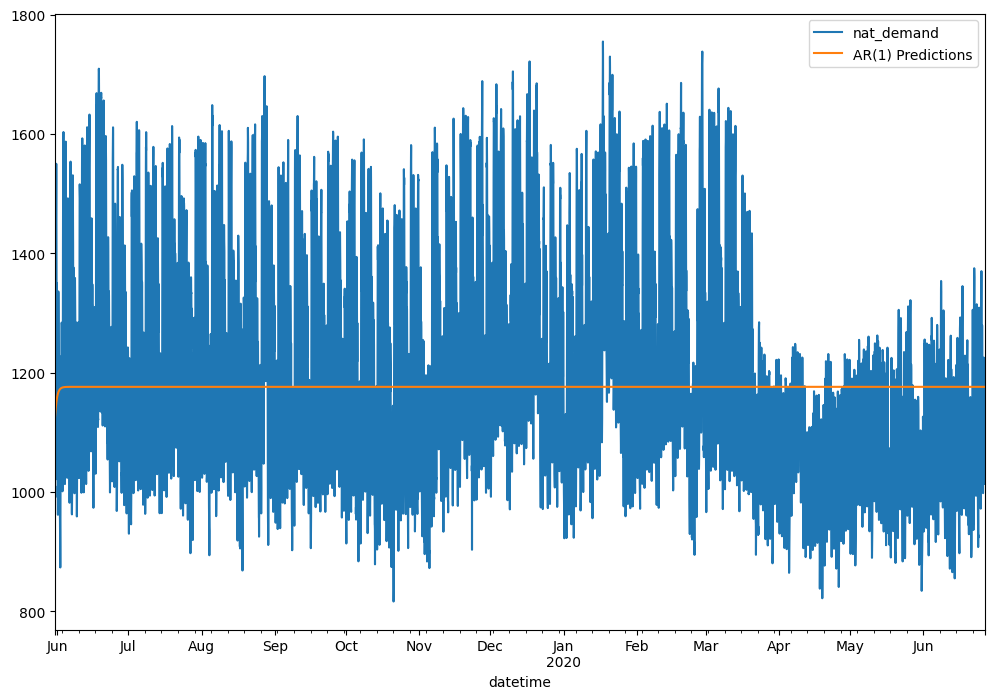

In [96]:
test_data['nat_demand'].plot(figsize=(12, 8), legend=True)
predictions1.plot(figsize=(12, 8), legend=True)

In [97]:
mae = mean_absolute_error(test_data['nat_demand'], predictions1)
print("Mean Absolute Error:", mae)
mse = mean_squared_error(test_data['nat_demand'], predictions1)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 153.58571748698736
Mean Squared Error: 35790.559052897246
Root Mean Squared Error: 189.18392916127218


# **ARIMA **

In [98]:
# Importing the `auto_arima` function from `pmdarima` library
!pip install pmdarima
from pmdarima import auto_arima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.9 MB/s eta 0:00:00


In [99]:
# Using auto_arima to automatically select the best ARIMA model for 'GrossCon' time series data

# Data input: 'GrossCon' time series data (first 1000 data points)
stepwise_fit = auto_arima(df['nat_demand'][:500],

                          start_p=0,  # Autoregressive order (p)
                          start_q=0,  # Moving average order (q)

                          max_p=3,  # Maximum autoregressive order (p)
                          max_q=3,  # Maximum moving average order (q)

                          m=24,  # Number of time steps in a seasonal cycle

                          seasonal=True,

                          d=None,

                          trace=True,

                          error_action='ignore',

                          suppress_warnings=True,

                          stepwise=True)


stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[24] intercept   : AIC=6259.356, Time=7.49 sec
 ARIMA(0,0,0)(0,0,0)[24] intercept   : AIC=6621.700, Time=0.07 sec
 ARIMA(1,0,0)(1,0,0)[24] intercept   : AIC=inf, Time=15.56 sec
 ARIMA(0,0,1)(0,0,1)[24] intercept   : AIC=5797.247, Time=10.13 sec
 ARIMA(0,0,0)(0,0,0)[24]             : AIC=8434.955, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[24] intercept   : AIC=6005.168, Time=1.46 sec
 ARIMA(0,0,1)(1,0,1)[24] intercept   : AIC=5797.939, Time=13.02 sec
 ARIMA(0,0,1)(0,0,2)[24] intercept   : AIC=5675.693, Time=19.81 sec
 ARIMA(0,0,1)(1,0,2)[24] intercept   : AIC=5679.311, Time=25.41 sec
 ARIMA(0,0,0)(0,0,2)[24] intercept   : AIC=6242.280, Time=7.50 sec
 ARIMA(1,0,1)(0,0,2)[24] intercept   : AIC=4911.569, Time=16.95 sec
 ARIMA(1,0,1)(0,0,1)[24] intercept   : AIC=5009.431, Time=7.68 sec
 ARIMA(1,0,1)(1,0,2)[24] intercept   : AIC=4726.761, Time=21.13 sec
 ARIMA(1,0,1)(1,0,1)[24] intercept   : AIC=4699.180, Time=6.73 sec
 ARIMA(1,0,1)(1,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  500
Model:             SARIMAX(1, 0, 2)x(1, 0, [1], 24)   Log Likelihood               -2335.539
Date:                              Tue, 06 Aug 2024   AIC                           4685.079
Time:                                      21:30:57   BIC                           4714.581
Sample:                                  01-03-2015   HQIC                          4696.655
                                       - 01-23-2015                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.5657      1.939      3.386      0.001       2.765      10.367
ar.L1          0.8892      0.017     51.905      0.000       0.856       0.923
ma.L1          0.4751      0.038     12.659      0.000       0.402       0.549
ma.L2          0.2485      0.042      5.928      0.000       0.166       0.331
ar.S.L24       0.9441      0.012     76.680      0.000       0.920       0.968
ma.S.L24      -0.6480      0.039    -16.732      0.000      -0.724      -0.572
sigma2       599.8471     29.054     20.646      0.000     542.902     656.792
===================================================================================
Ljung-Box (L1) (Q):                   2.17   Jarque-Bera (JB):                95.68
Prob(Q):                              0.14   Prob(JB):                         0.00
Heteroskedasticity (H):               1.48   Skew:                             0.19
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='datetime'>

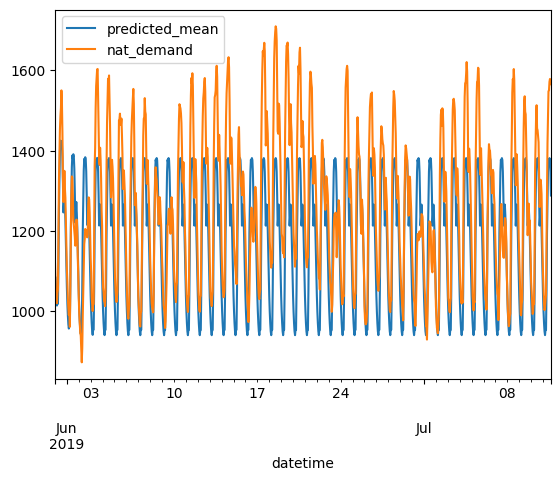

In [100]:
# Import the necessary library
import statsmodels.api as sm

# Create the ARIMA model with the selected parameters
model = sm.tsa.ARIMA(train_data['nat_demand'], order=(1, 0, 2), seasonal_order=(1, 0, 1, 24), enforce_stationarity=False)

# Fit the ARIMA model to the data
model_fit = model.fit()
# Make future predictions
forecasted_values = model_fit.forecast(1000)
forecasted_values.plot(legend=True)
test_data['nat_demand'][:1000].plot(legend=True)

In [101]:
mae = mean_absolute_error(test_data['nat_demand'][:1000], forecasted_values)
print("Mean Absolute Error:", mae)
mse = mean_squared_error(test_data['nat_demand'][:1000], forecasted_values)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 118.60493418457493
Mean Squared Error: 19848.414734119757
Root Mean Squared Error: 140.8844020256315


# **SARIMA**

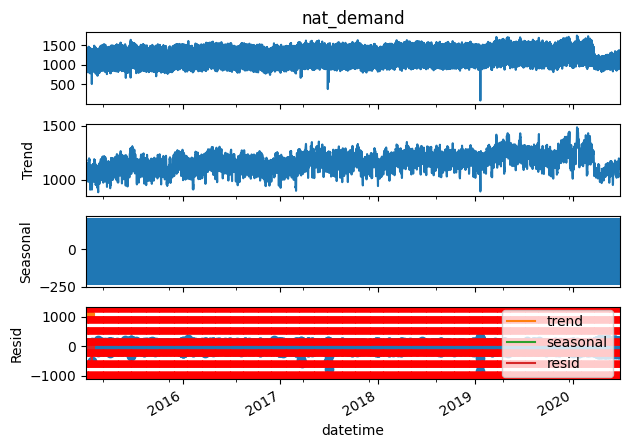

In [110]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['nat_demand'], model='additive')
result.plot();
n_days = 30
n = 24 * n_days
result.trend[:n].plot(legend=True);

result.seasonal[:n].plot(legend=True);

result.resid[:n].plot(legend=True);

min_date, max_date = df.index.min(), df.index.max()
current_date = min_date

while current_date <= max_date:
    if current_date.weekday() == 4:  # Monday is considered the start of the week
        plt.axvline(x=current_date, color='red', linestyle='--')
    current_date += pd.Timedelta(days=1)

<Axes: xlabel='datetime'>

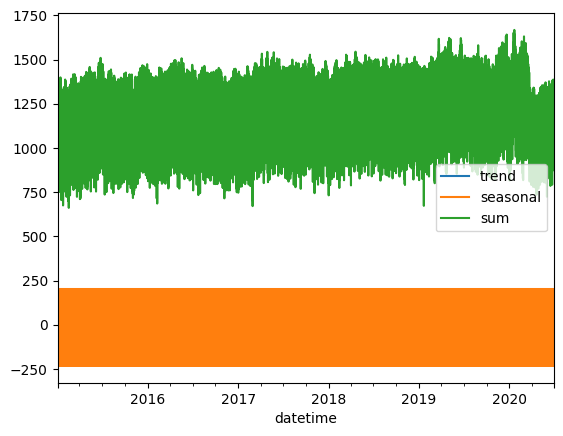

In [111]:
decomp_data = {}
decomp_data['trend'] = result.trend
decomp_data['seasonal'] = result.seasonal
df_decom_data = pd.DataFrame(decomp_data)
df_decom_data['sum'] = df_decom_data['trend'] + df_decom_data['seasonal']
df_decom_data.plot()

In [112]:
df_decom_data.head()


,trend,seasonal,sum
datetime,,,
2015-01-03 01:00:00+00:00,NaN,-171.887459,NaN
2015-01-03 02:00:00+00:00,NaN,-201.678198,NaN
2015-01-03 03:00:00+00:00,NaN,-223.106475,NaN
2015-01-03 04:00:00+00:00,NaN,-232.980741,NaN
2015-01-03 05:00:00+00:00,NaN,-220.058009,NaN


<Axes: xlabel='datetime'>

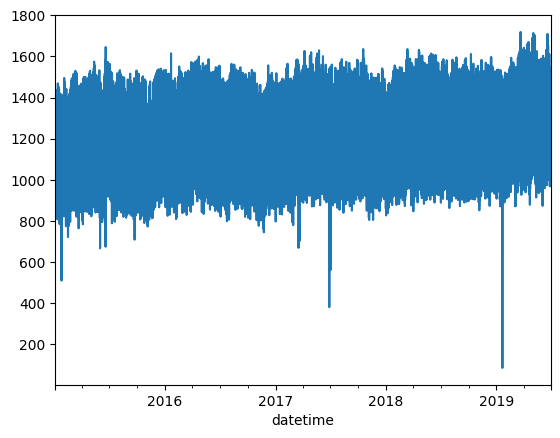

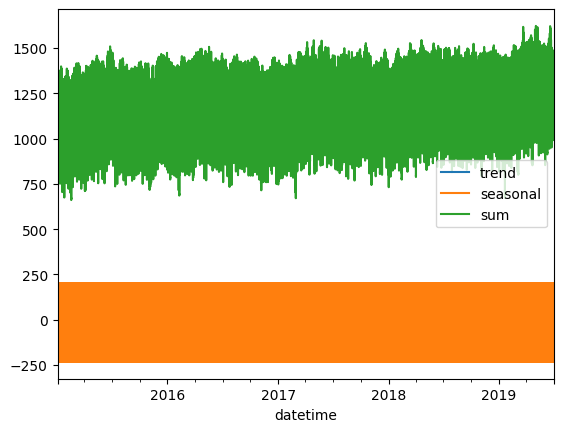

In [113]:
dev_date_str = '2019-06-30'
# Convert dev_date_str to a datetime object
dev_date = datetime.strptime(dev_date_str, '%Y-%m-%d')
dev_date = pd.Timestamp(dev_date, tz='UTC')
train_data_exo = df[:dev_date]
test_data_exo = df[dev_date:]

df_decom_data_train = df_decom_data[:dev_date]
train_data_exo['nat_demand'].plot()
df_decom_data_train.plot()

In [114]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

index = - 200

model = SARIMAX(train_data_exo['nat_demand'][index:],
                exog=df_decom_data_train[index:],
                order=(1, 0, 2),
                seasonal_order=(1, 0, 1, 24),
                enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                           nat_demand   No. Observations:                  200
Model:             SARIMAX(1, 0, 2)x(1, 0, [1], 24)   Log Likelihood                -899.180
Date:                              Tue, 06 Aug 2024   AIC                           1816.360
Time:                                      21:42:45   BIC                           1846.045
Sample:                                  06-21-2019   HQIC                          1828.373
                                       - 06-30-2019                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
trend          0.3566      0.026     13.695      0.000       0.306       0.408
seasonal       0.2874      0.042      6.914      0.000       0.206       0.369
sum            0.6441      0.019     33.986      0.000       0.607       0.681
ar.L1          0.8010      0.051     15.555      0.000       0.700       0.902
ma.L1          0.4029      0.079      5.101      0.000       0.248       0.558
ma.L2          0.2439      0.082      2.992      0.003       0.084       0.404
ar.S.L24       0.7210      0.162      4.438      0.000       0.403       1.039
ma.S.L24      -0.4562      0.209     -2.186      0.029      -0.865      -0.047
sigma2       456.4023     37.560     12.151      0.000     382.786     530.018
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):                55.48
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               0.38   Skew:                             0.58
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.14e+18. Standard errors may be unstable.
"""

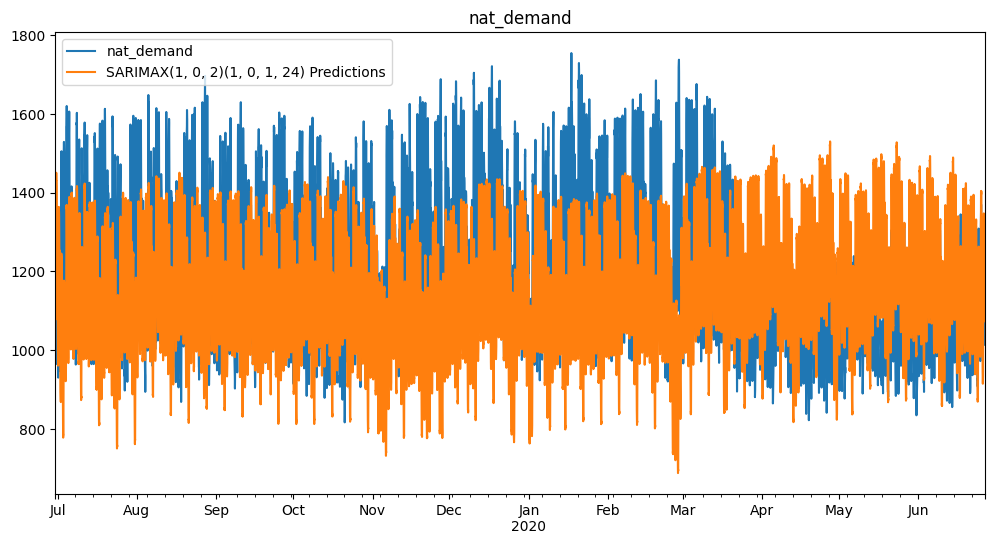

In [116]:
start_hour = train_data_exo.index.max()
n_hours_to_predict = test_data_exo.shape[0]

end_hour = start_hour + pd.Timedelta(hours=n_hours_to_predict)

delt = end_hour - start_hour

n_years_back = 3
start_hour_exo_test = start_hour - pd.DateOffset(years=n_years_back)
exog_forecast = df_decom_data_train[start_hour_exo_test: start_hour_exo_test + delt][:-1]

predictions = results.predict(start=start_hour,
                              end=end_hour,
                              exog=exog_forecast).rename('SARIMAX(1, 0, 2)(1, 0, 1, 24) Predictions')
title = 'nat_demand'
ylabel=''
xlabel=''

ax = test_data_exo['nat_demand'][:100000].plot(legend=True,figsize=(12,6),title=title)
predictions[:100000].plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [117]:
mae = mean_absolute_error(test_data_exo['nat_demand'], predictions[:-1])
print("Mean Absolute Error:", mae)
mse = mean_squared_error(test_data_exo['nat_demand'], predictions[:-1])
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 142.86852999641866
Mean Squared Error: 32758.993199154498
Root Mean Squared Error: 180.9944562663578


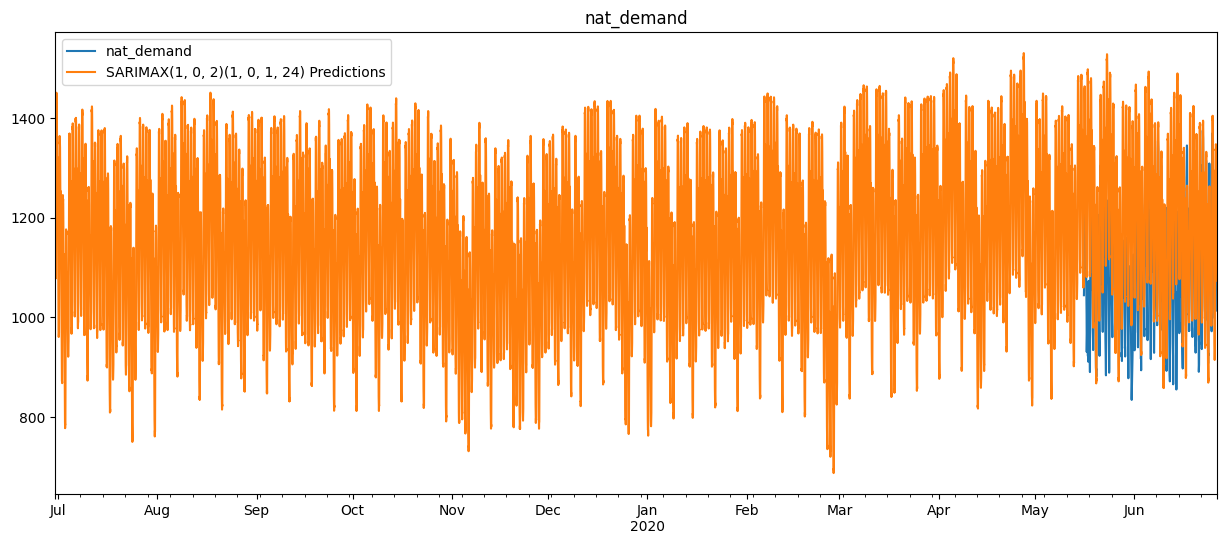

In [119]:
# Plot predictions against known values
title = 'nat_demand'
ylabel=''
xlabel=''

ax = test_data_exo['nat_demand'][-1000:].plot(legend=True,figsize=(15,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);